# Rayleigh-Benard Convection In 2.5D
All derivatives in the y direction (longitudinal) are zero

## Imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
import h5py

from rayleighbenard import simulation, plotting, utils

# Change this to use a different directory for saving the data
data_dir = "./analysis_carpathia"

print('Parameters to use:')
for k, v in utils.read_params(data_dir).items():
    print(f'{k} = {v}')

Parameters to use:
Ra = 100000.0
Pr = 1
Ek = 0.004
Theta = 0.523598776
R = 10
resX = 64
resZ = 32
Lx = 4
Lz = 1
duration = 0.2
timestep = 1e-06
timestep_analysis = 0.0015


## The simulation

In [ ]:
simulation.run(data_dir)

## Analysis
Tasks in this section can be run without running the simulation above, as long as it has been run before in the specified directory

In [ ]:
params = utils.read_params(data_dir)
    with h5py.File("{}/analysis.h5".format(data_dir), mode='r') as file:
        avg_time = 0.5
        t = np.array(file['tasks']['t'])
        u = np.array(file['tasks']['u'])
        w = np.array(file['tasks']['w'])
        uw = u * w
        uw_avgt = np.mean(uw[t >= params.duration - avg_time], axis=0)
        

In [ ]:
plotting.time_averaged(data_dir)

KeyError: "Unable to open object (object 'AngMom' doesn't exist)"

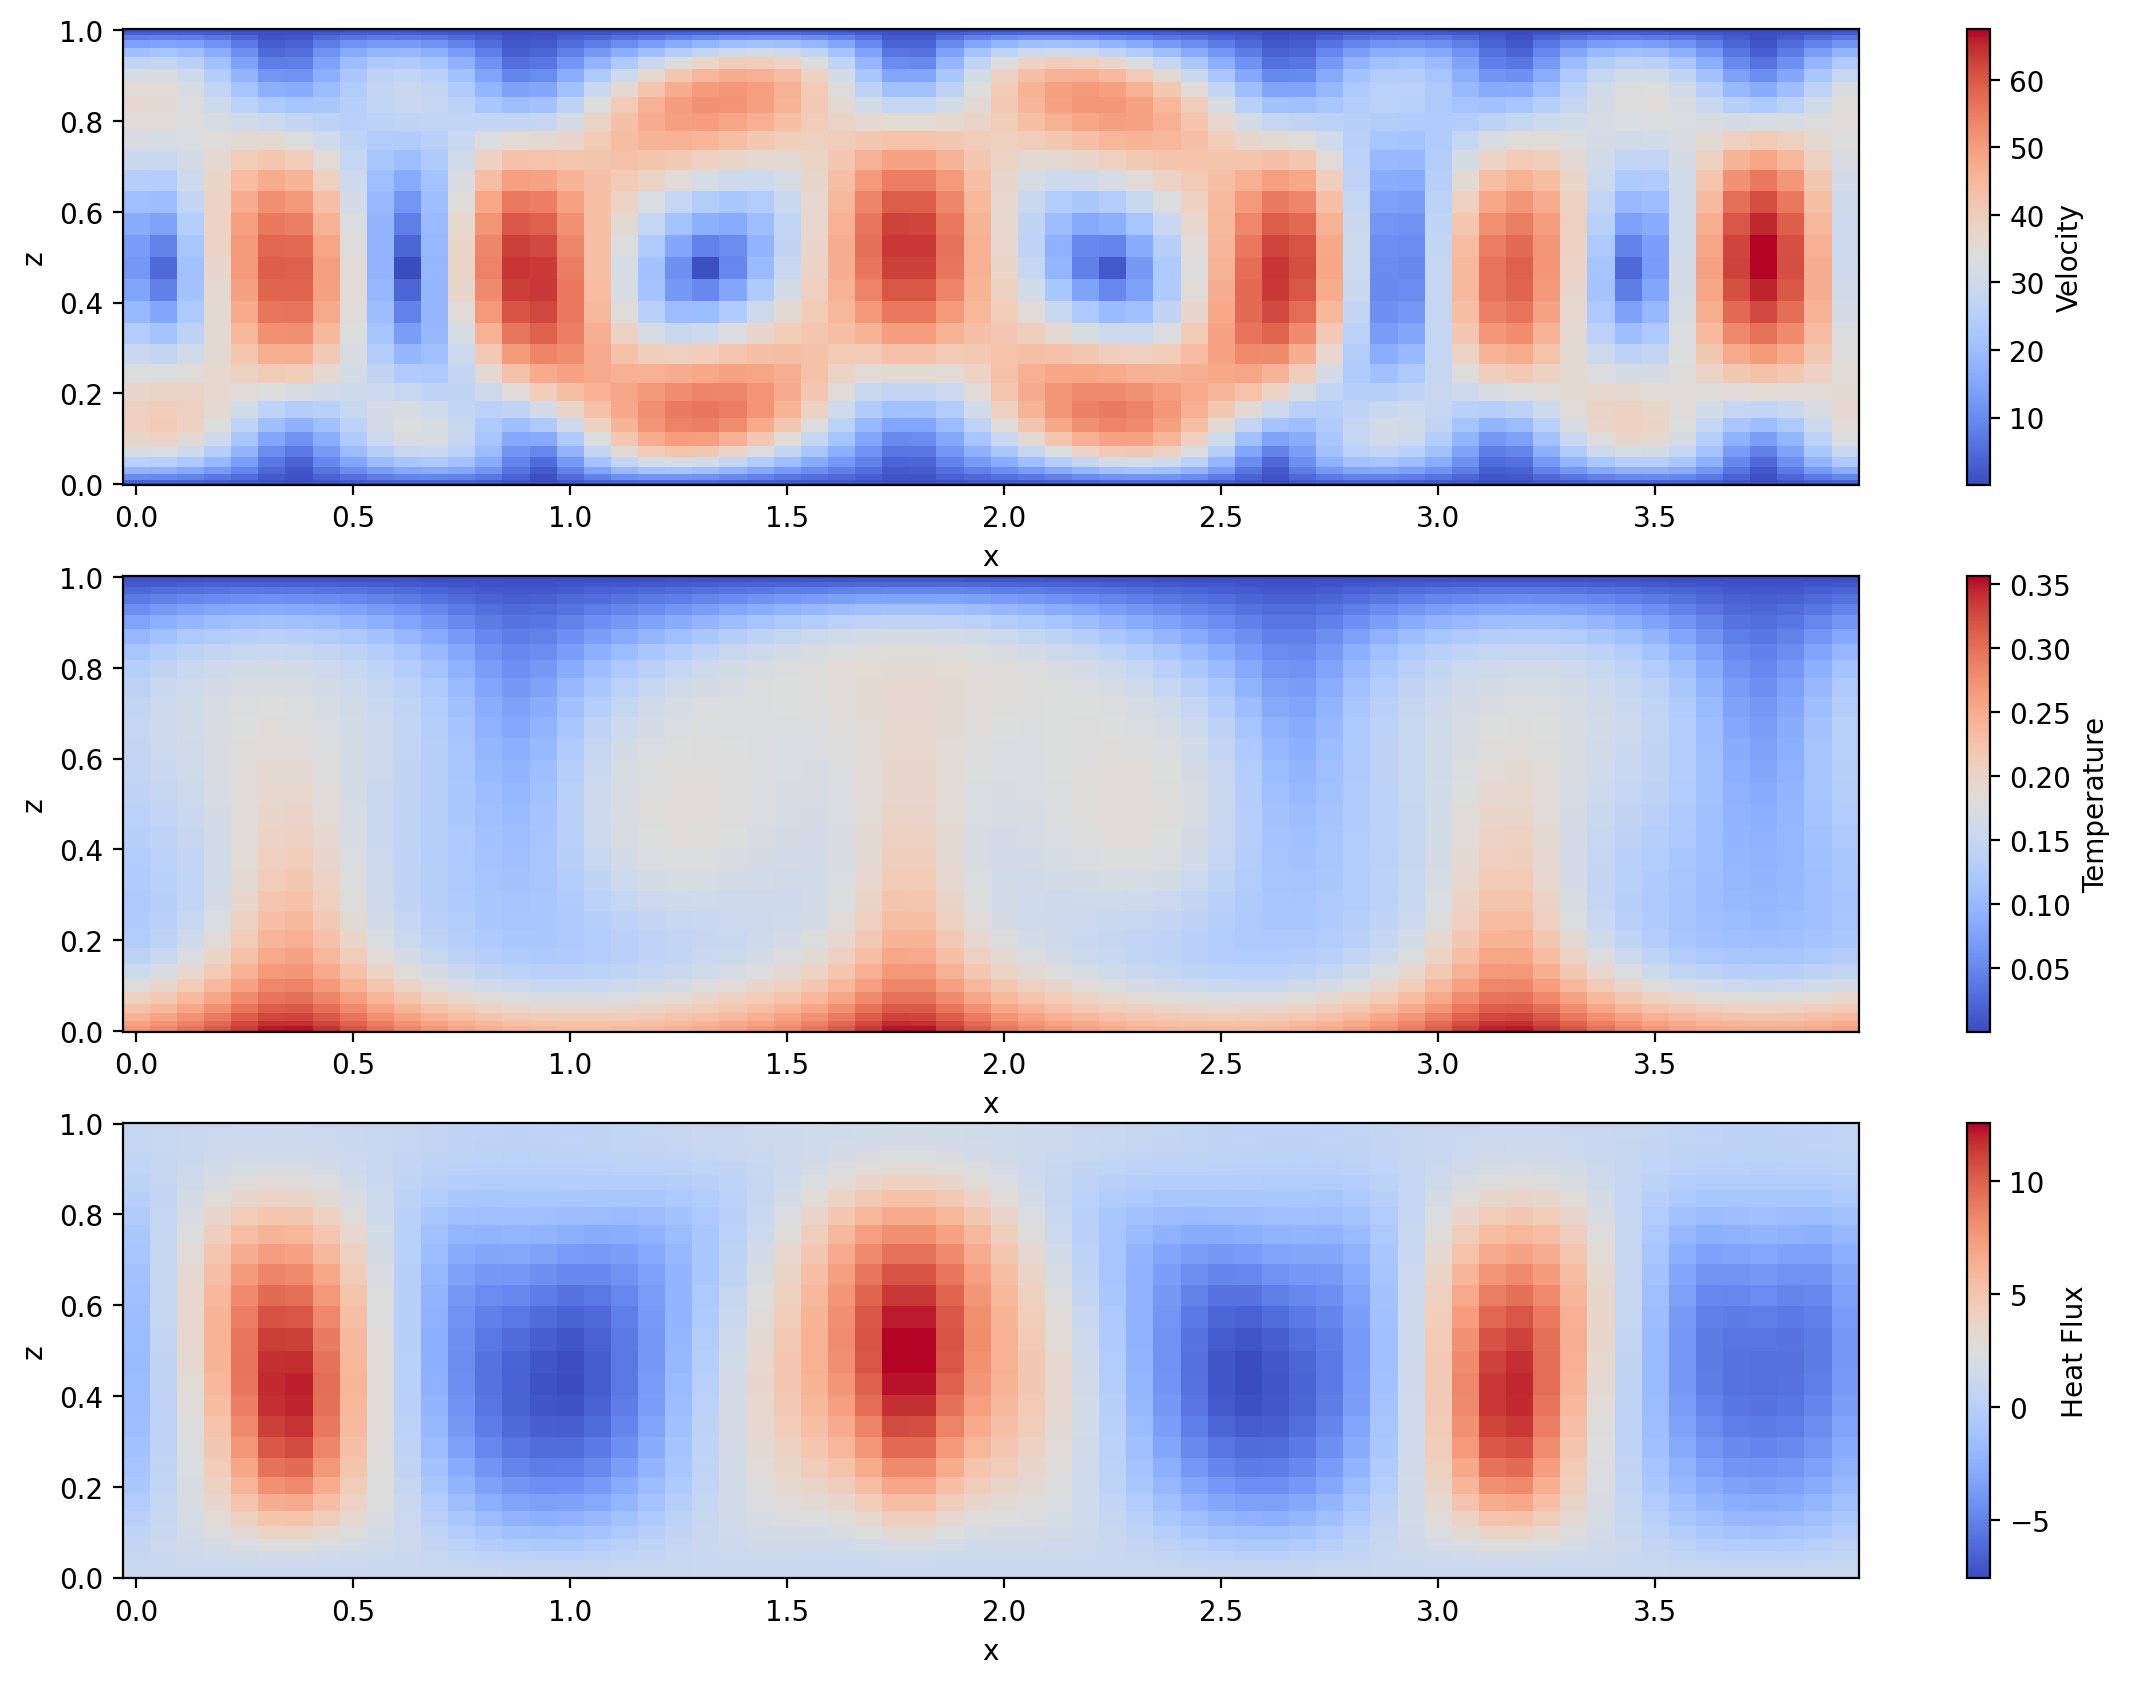

In [2]:
plotting.final_state(data_dir)

In [3]:
plotting.video(data_dir)
display(Video(data_dir + "/video.mp4"))

2021-10-30 14:08:53,042 matplotlib.animation 0/1 INFO :: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-10-30 14:08:53,045 matplotlib.animation 0/1 INFO :: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1400x350 -pix_fmt rgba -r 22.22222222222222 -i pipe: -vcodec h264 -pix_fmt yuv420p -y ./analysis_carpathia/video.mp4


In [ ]:
plotting.average_temp(data_dir)

In [ ]:
plotting.average_vel(data_dir)

In [ ]:
plotting.heat_flux(data_dir)

In [ ]:
plotting.ang_mom_flux(data_dir)

In [ ]:
plotting.heat_flux_spectra(data_dir)

In [ ]:
plotting.angmom_flux_spectra(data_dir)